# **Multi Feature Extraction - A Skeleton Structure for Image classification**

# Traffic Sign Board Detection

In [1]:
!git clone https://github.com/Jaish19/machine_learning.git

Cloning into 'machine_learning'...
remote: Enumerating objects: 574, done.
remote: Counting objects: 100% (574/574), done.
remote: Compressing objects: 100% (511/511), done.
remote: Total 574 (delta 65), reused 553 (delta 58), pack-reused 0 (from 0)
Receiving objects: 100% (574/574), 37.68 MiB | 15.79 MiB/s, done.
Resolving deltas: 100% (65/65), done.


In [2]:
!pip install mahotas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 45.1 MB/s eta 0:00:00


In [3]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imutils import paths
import numpy as np
import argparse
import mahotas
import cv2
import pickle as cPickle
from google.colab.patches import cv2_imshow

**Color Channel Statistics**

![alt text](https://drive.google.com/uc?id=1nkINLbFb4RISenHO7AVmCXQ_ir-jBvIx)

**Haralick Features**

Haralick features are a set of texture descriptors derived from the co-occurrence matrix of pixel intensities in an image. They capture various properties of texture, such as contrast, correlation, and homogeneity.

**Common Haralick Features**

Some of the common Haralick features include:

Contrast: Measures the intensity contrast between a pixel and its neighbor over the entire image.

Correlation: Measures how correlated a pixel is with its neighbor.

Energy: Measures the sum of squared elements in the GLCM (Gray-Level Co-occurrence Matrix), representing uniformity.

Homogeneity: Measures the closeness of the distribution of elements in the GLCM to the GLCM diagonal.

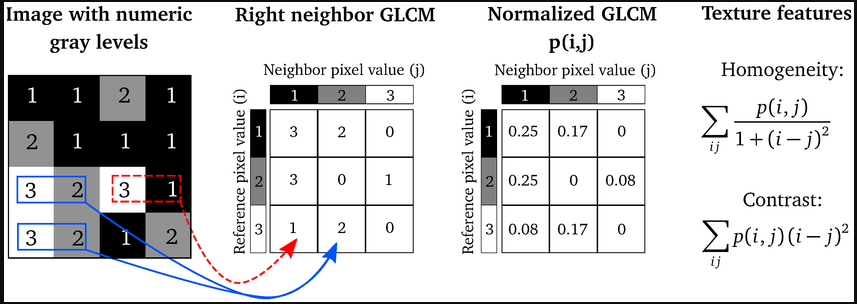

In [4]:
def describe(image):
	# extract the mean and standard deviation from each channel of the image
	# in the HSV color space
	image = cv2.resize(image,(500,500))
	(means, stds) = cv2.meanStdDev(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))
	colorStats = np.concatenate([means, stds]).flatten()

	# extract Haralick texture features
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	haralick = mahotas.features.haralick(gray).mean(axis=0)

	# return a concatenated feature vector of color statistics and Haralick
	# texture features
	return np.hstack([colorStats, haralick])

In [5]:
imagePaths = sorted(paths.list_images("machine_learning/Machine_learning/5_Sign_board_skeleton/Train"))
data = []
labels = []

In [6]:
for imagePath in imagePaths:
	# extract the label and load the image from disk
	label = imagePath.split("/")[-2]
	image = cv2.imread(imagePath)
	print (label)

	# extract features from the image, then update the list of lables and
	# features
	features = describe(image)
	print (features)
	labels.append(label)
	data.append(features)

Left_turn
[ 3.20227880e+01  3.75151600e+00  2.18864904e+02  6.58575629e+01
  9.24607569e+00  7.88056025e+01  5.21651500e-01  4.32805570e+02
  9.65972478e-01  6.35799445e+03  8.82950632e-01  4.36663890e+02
  2.49991722e+04  2.16563460e+00  2.46961719e+00  2.82452997e-03
  1.22839416e+00 -6.71153942e-01  9.56749163e-01]
Left_turn
[ 1.81319520e+01  5.53630840e+01  1.86696868e+02  3.32213920e+01
  1.04367478e+02  9.47526145e+01  4.14312148e-01  3.91732040e+02
  9.81050507e-01  1.03428525e+04  9.44825487e-01  3.55215619e+02
  4.09796779e+04  2.01942988e+00  2.14863297e+00  3.45247341e-03
  6.85054390e-01 -8.19799769e-01  9.74330628e-01]
Left_turn
[ 1.70691200e+00  8.04446080e+01  2.16400132e+02  3.73197259e+00
  1.00171021e+02  6.91669488e+01  3.47430687e-01  1.21463346e+02
  9.92659588e-01  8.27288883e+03  9.03008423e-01  3.47419507e+02
  3.29700920e+04  2.61566065e+00  3.01813056e+00  3.10343868e-03
  1.09414168e+00 -7.48588506e-01  9.86362667e-01]
Left_turn
[ 1.26639880e+01  1.05542444e+

In [7]:
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(data),
	np.array(labels), test_size=0.25, random_state=42)

In [8]:
model = RandomForestClassifier(n_estimators=20, random_state=42)

In [9]:
print("[INFO] training model...")
model.fit(trainData, trainLabels)

# evaluate the classifier
print("[INFO] evaluating...")
predictions = model.predict(testData)
print(classification_report(testLabels, predictions))

[INFO] training model...
[INFO] evaluating...
              precision    recall  f1-score   support

   Left_turn       0.33      0.25      0.29         4
        SLOW       0.33      0.43      0.38         7
 STOP_SIGNAL       0.80      0.80      0.80         5
  no_parking       0.67      0.80      0.73         5
  right_turn       0.40      0.67      0.50         3
school_ahead       0.50      0.38      0.43         8
 speedbeaker       0.43      1.00      0.60         3
       uturn       1.00      0.25      0.40         4
       zebra       0.67      0.33      0.44         6

    accuracy                           0.51        45
   macro avg       0.57      0.54      0.51        45
weighted avg       0.57      0.51      0.50        45



In [10]:
f = open("classifier.cPickle", "wb")
f.write(cPickle.dumps(model))
f.close()